#Importing Libraries


In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

#Loading Image

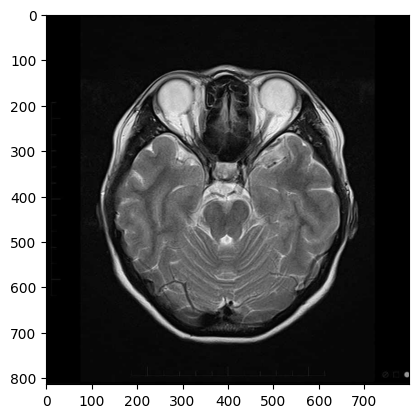

In [ ]:
img = cv2.imread('/content/MRI-BRAIN-WITH-CONTRAST-0001.jpg', cv2.IMREAD_GRAYSCALE)
img = np.uint8(img)
plt.imshow(img, cmap='gray')
plt.show()

#Determining the seed points for Gray and White matter

In [ ]:
white_matter_seed = (350, 400)
threshold = 60

In [ ]:
rows, cols = img.shape
segmented = np.zeros_like(img)

In [ ]:
min_pixel = img.min()
max_pixel = img.max()

In [ ]:
print(f'Min Pixel Value: {min_pixel}')
print(f'Max Pixel Value: {max_pixel}')

Min Pixel Value: 0
Max Pixel Value: 255


#White Matter Segmentation

In [ ]:
seed_x1, seed_y1 = white_matter_seed
segmented[seed_x1, seed_y1] = 255
region_mean1 = img[seed_x1, seed_y1]
growing = True
pixels1 = [(seed_x1, seed_y1)]

## Region Growing Algorithm

In [ ]:
while growing:
    new_pixels = []
    for x, y in pixels1:
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0:
                if abs(int(img[nx, ny]) - region_mean1) < threshold:  #threshold condition
                    segmented[nx, ny] = 255
                    new_pixels.append((nx, ny))

    if new_pixels:
        region_mean1 = np.mean([img[x, y] for x, y in new_pixels])
        pixels1 = new_pixels
    else:
        growing = False #if no pixel is found, growing stops

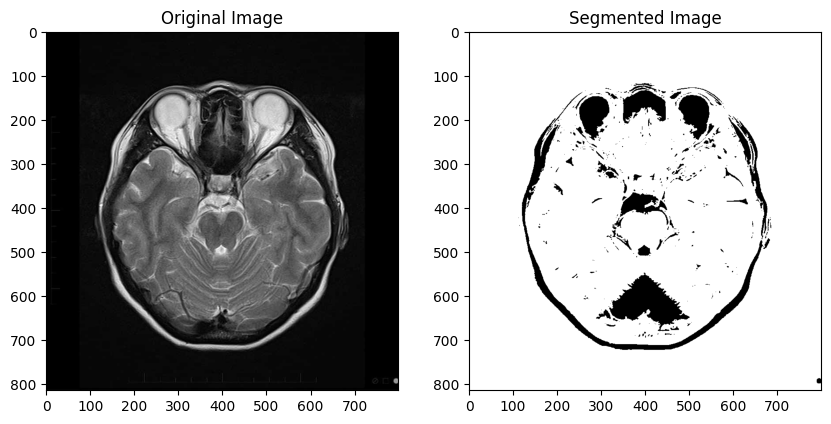

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.show()

##Merging the regions

In [ ]:
def merge_regions(regions) :
  while True:
    merged = False
    new_regions = []
    while regions:
      current = regions.pop()
      was_merged = False
      for idx, region in enumerate(new_regions):
          if abs(np.mean(region) - np.mean (current)) < 5:
            new_regions[idx] = np.vstack([region, current])
            was_merged = True
            merged = True
            break
      if not was_merged:
          new_regions.append(current)
    regions = new_regions
    if not merged:
        break
  return regions

##Splitting and Merging

In [ ]:
def split_and_merge(image, num_regions):
  rows, cols = image.shape
  step = rows // num_regions
  regions = [np.arange(1, min(i + step, rows)) for i in range(8, rows, step)]
  regions = merge_regions (regions)

  output_image = np.zeros_like(image)
  for region in regions:
    for row in region:
      output_image[row, :] = ((np.mean(image[region,:]) - image [row, : ]) < 10 ) * 255
  return output_image

##Displaying the image

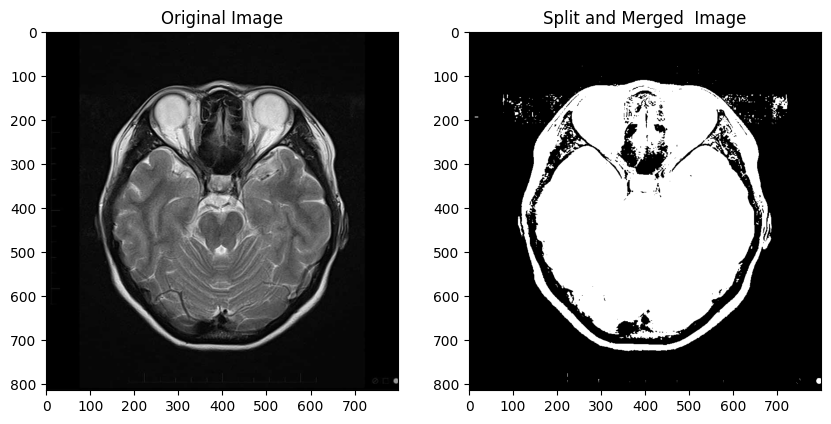

In [ ]:
split_merged_image = split_and_merge(img, 4)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(split_merged_image, cmap='gray')
plt.title('Split and Merged  Image')

plt.show()

#Gray Matter Segementation

In [ ]:
gray_matter_seed = (200, 250)
threshold = 60

In [ ]:
rows, cols = img.shape
segmented = np.zeros_like(img)

In [ ]:
seed_x2, seed_y2 = (200, 250)
segmented[seed_x2, seed_y2] = 255
region_mean2 = img[seed_x2, seed_y2]
growing = True
pixels2 = [(seed_x2, seed_y2)]

In [ ]:
while growing:
    new_pixels = []
    for x, y in pixels2:
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0:
                if abs(int(img[nx, ny]) - region_mean2) < threshold:  #threshold condition
                    segmented[nx, ny] = 255
                    new_pixels.append((nx, ny))

    if new_pixels:
        region_mean2 = np.mean([img[x, y] for x, y in new_pixels])
        pixels2 = new_pixels
    else:
        growing = False #if no pixel is found, growing stops

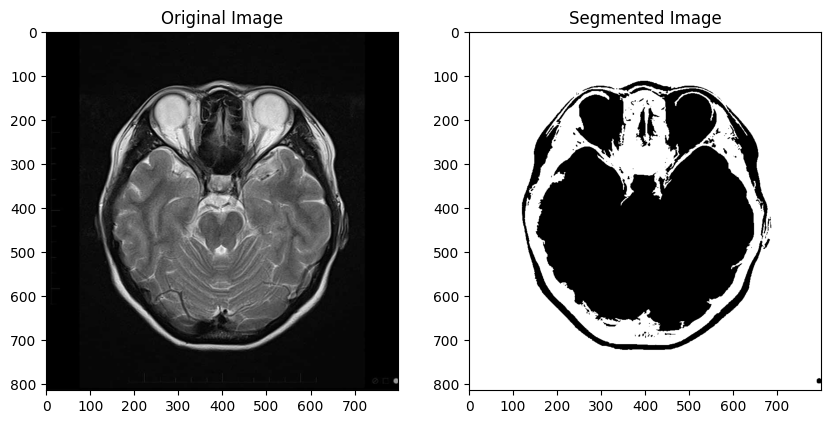

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.show()

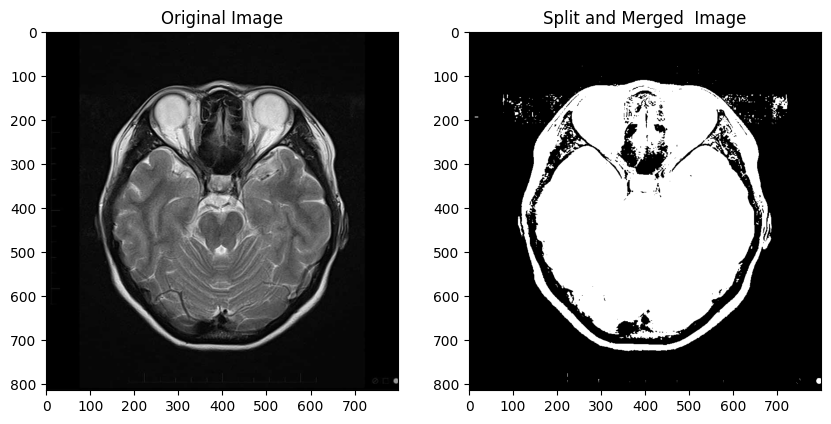

In [ ]:
split_merged_image = split_and_merge(img, 4)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(split_merged_image, cmap='gray')
plt.title('Split and Merged  Image')

plt.show()

#Applications

* Medical Imaging: Essential for the precise segmentation of tissues in MRI and CT scans, aiding in accurate diagnoses and informed treatment planning.

* Environmental Analysis: Critical in remote sensing, this algorithm facilitates the identification of land use and land cover in satellite imagery through effective segmentation of geographical features.

* Object Boundary Detection: Improves object detection capabilities by clearly delineating boundaries based on intensity similarities, leading to more accurate recognition and classification.

* Facial Feature Extraction: Plays a crucial role in facial recognition systems by segmenting facial features, thereby enhancing security and authentication processes.

* Autonomous Navigation: Utilized in self-driving technology to identify and segment key environmental features, such as road signs and lane markings, which are vital for safe navigation.

* Image Quality Optimization: Aids in image compression by minimizing color diversity within segments, preserving essential visual details while reducing file size.

#Conclusion


In conclusion, this experiment emphasizes the significance of image segmentation, merging, and splitting techniques in image processing.
Image Segmentation involves partitioning an image into distinct regions based on shared characteristics like color or intensity. Common algorithms include thresholding, and edge detection (e.g., Canny), which enable precise isolation of areas of interest.
Image Merging combines segmented regions to create a cohesive representation of the image, enhancing clarity and context. Techniques such as region merging based on similarity or hierarchical clustering ensure that merged segments retain their integrity.
Image Splitting divides an image into smaller parts for detailed analysis, facilitating localized processing. This can be done using grid patterns or object-based divisions, making large images manageable without losing detail.


Together, these techniques form a comprehensive framework for improving image processing efficiency, leading to better feature extraction and analysis. The experiment highlights the need for ongoing refinement to enhance their effectiveness across various applications.